<h1> Data Science Exercise </h1>
<h1> Data set: New York City Taxi and Limousine Commission trip records </h1>

https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

<h2> Within this notebook we will be using the data set from September 2015, for green taxis </h2>

<h2> 1. Looking at the Data Quality in Depth, so we can do a through observation </h2>
<h3> Loading initial dataset and getting the  computated descriptive statistics </h3>

In [48]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

initial_data=pd.read_csv('green_tripdata_2015-09.csv')
print("Number of rows and columns this data set has")
print(initial_data.shape)
print("First 5 entries of data set")
print(initial_data.head(5))
print("Summary Statistics")
print(initial_data.describe())

Number of rows and columns this data set has
(1494926, 21)
First 5 entries of data set
   VendorID lpep_pickup_datetime Lpep_dropoff_datetime Store_and_fwd_flag  \
0         2  2015-09-01 00:02:34   2015-09-01 00:02:38                  N   
1         2  2015-09-01 00:04:20   2015-09-01 00:04:24                  N   
2         2  2015-09-01 00:01:50   2015-09-01 00:04:24                  N   
3         2  2015-09-01 00:02:36   2015-09-01 00:06:42                  N   
4         2  2015-09-01 00:00:14   2015-09-01 00:04:20                  N   

   RateCodeID  Pickup_longitude  Pickup_latitude  Dropoff_longitude  \
0           5        -73.979485        40.684956         -73.979431   
1           5        -74.010796        40.912216         -74.010780   
2           1        -73.921410        40.766708         -73.914413   
3           1        -73.921387        40.766678         -73.931427   
4           1        -73.955482        40.714046         -73.944412   

   Dropoff_latitude  Pa

<h3> Looking at descriptive statistics in depth </h3>

In [3]:
print("How many features")
print(len(initial_data.columns))
print("What are the types of these features?")
print(initial_data.dtypes)
print("Looking to determine if there are missing values?")
print(initial_data.count())

How many features
21
What are the types of these features?
VendorID                   int64
lpep_pickup_datetime      object
Lpep_dropoff_datetime     object
Store_and_fwd_flag        object
RateCodeID                 int64
Pickup_longitude         float64
Pickup_latitude          float64
Dropoff_longitude        float64
Dropoff_latitude         float64
Passenger_count            int64
Trip_distance            float64
Fare_amount              float64
Extra                    float64
MTA_tax                  float64
Tip_amount               float64
Tolls_amount             float64
Ehail_fee                float64
improvement_surcharge    float64
Total_amount             float64
Payment_type               int64
Trip_type                float64
dtype: object
Looking to determine if there are missing values?
VendorID                 1494926
lpep_pickup_datetime     1494926
Lpep_dropoff_datetime    1494926
Store_and_fwd_flag       1494926
RateCodeID               1494926
Pickup_longitude   

<h1> Observations of Data Quality</h1>
<li> VendorId, Payment type, trip type, and RatesCodeId are nominal </li>
<li> There is no data for Ehail_fee. So this feature would not be useful in an anaylsis </li>
<li> There seems to be missing data for the Type type as we only have data that is associated with the trip type for 1494922 entries</li>
<li> The passenger count ranges from 1 to 9 </li>
<li> The pickup lpep_pickup_datetime and Lpep_dropoff_datetime are stored as an object and should be converted to datetime for better analysis </li>
<li> The Store_and_fwd_flag is categorical </li>     
<li> The fare amount ranges from less than a dollar all the way up to 580 dollars </li>
<li> The total amount ranges from less than a dollar all the way up to over 500 dollars </li>
<li> The trip distance ranges from no miles, all the way to 603.1 miles. Since the max amount of miles is 603.1  And that does not make much sense for a taxi, we can see the max value is an outlier. </li>
    




<h1> 2. Explore and Visualize the Data  for trip distance </h1>
<h2> Looking more in depth @ Trip Distances </h2>

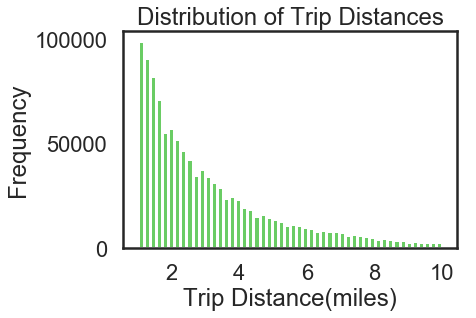

In [31]:
tripDistance=initial_data[['Trip_distance']]
sns.distplot(tripDistance,kde=False,hist_kws={"range": [1,10],"linewidth": 3, "alpha": 1, "color":"g"}, 
             kde_kws={"color": "b", "lw": 3},)
plt.title('Distribution of Trip Distances')
plt.ylabel("Frequency")
plt.xlabel("Trip Distance(miles)")
plt.show()

In [32]:
print("Median",tripDistance.median())
print("\n")
print("Mean",tripDistance.mean())
print("\n")
print("Standard Deviation",tripDistance.std())
print("\n")
print("Variance",tripDistance.var())
print("\n")
print("Min",tripDistance.min())
print("\n")
print("Max",tripDistance.max())



Median Trip_distance    1.98
dtype: float64


Mean Trip_distance    2.968141
dtype: float64


Standard Deviation Trip_distance    3.076621
dtype: float64


Variance Trip_distance    9.465596
dtype: float64


Min Trip_distance    0.0
dtype: float64


Max Trip_distance    603.1
dtype: float64


Text(0.5, 0, 'Trip Distance (Miles)')

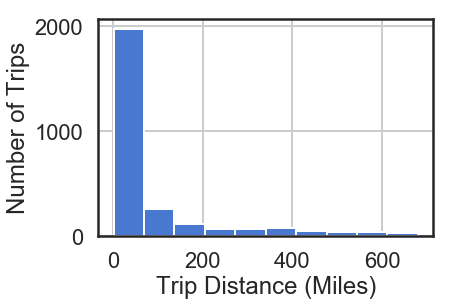

In [33]:
from collections import Counter


initial_data['Trip_distance'].value_counts().hist(range=[1,680])
plt.ylabel("Number of Trips")
plt.xlabel("Trip Distance (Miles)")
#most trips were between 0 and 100 miles, but there is a wide range of trips with miles alway the way up to over 680 miles.

In [34]:
trip_Freq=initial_data['Trip_distance'].value_counts()
trip_Freq=pd.DataFrame(trip_Freq).reset_index();
trip_Freq.columns=['Miles', 'Amount of Trip']
print("First 5 rows data frame where we have the number of miles for a  \n trip and the amount of trips has this amount of miles")
print(trip_Freq.head())

First 5 rows data frame where we have the number of miles for a  
 trip and the amount of trips has this amount of miles
   Miles  Amount of Trip
0    0.0           20592
1    1.0           16735
2    0.9           16699
3    0.8           16152
4    1.1           16070


<p>  Due to the distribution of how many trips had the same distance, 
this could explain the high standard deviation as we have <strong> a wide spread amount of trips with different amount of miles. </strong> spread over a large range </p>




<h3> Explore and Remove outliers to get a better insight of trip distances. We should do this as the max trip distance is 603 miles and the min is 0 miles. We can get a better understanding of the anomaly in the dataset. 
</h3>

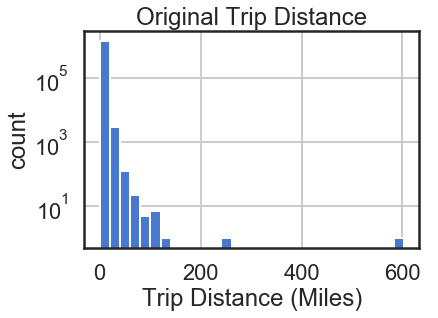

Text(0, 0.5, 'Count')

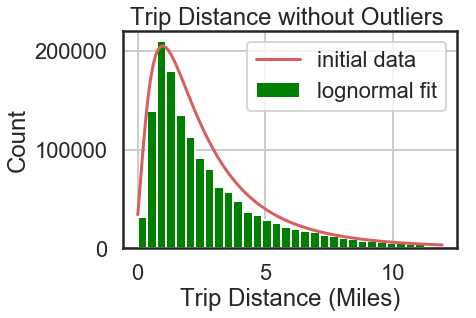

In [35]:
import matplotlib.pyplot as plot
from scipy.stats import lognorm,norm
import numpy


initial_data.Trip_distance.hist(bins=30)
plt.yscale('log')
plt.ylabel('count')
plt.xlabel('Trip Distance (Miles)')
plt.title("Original Trip Distance")
plt.show()

#creat a vector to contain trip distance

trip_distance=initial_data.Trip_distance
# Outliers are more than 3 standard deviation away from median
#remove data that contains trips with 0 distance
trip_distance=initial_data.Trip_distance[initial_data.Trip_distance>0]
trip_distance[~((trip_distance-trip_distance.median()).abs()>3*trip_distance.std())].hist(bins=30,color='green') 

#apply a log normal fit 
scatter,loc,mean = lognorm.fit(initial_data.Trip_distance.values,
                               scale=initial_data.Trip_distance.mean(),
                             loc=0)
pdf_fitted=lognorm.pdf(np.arange(0.01,12,.1),scatter,loc,mean)
plt.plot(np.arange(0.01,12,.1),700000*pdf_fitted,'r') 
plt.legend(['initial data','lognormal fit'])
plt.title('Trip Distance without Outliers ')
plt.xlabel('Trip Distance (Miles)')
plt.ylabel('Count')

<h3>Analysis: </h3>
<li> The figure on the top shows the original trip distance. We have the count of the original in a log scale, so it is easier to make the distribution more visible. </li>
<li> The bottom figure shows the trip distiance without outliers. Outliers are considered to be data points  further than 3 standard deviation away from the mean.  We are also filtering data points that are 0. No trips that have 0 miles. </li>
<li> The data is asymmetrically distributed </li>
<li> It is skewed to the right and has a median that is smaller than the mean and standard deviation </li>
<li> The skewness is due to the lower boundary being 0 because we cannot have a trip that has negative miles. </li>
<li> The fit is lognormal distribution distribution </li>

<h1>  3. Trip Distances by Hour </h1>

In [49]:
import datetime
initial_data['pickup'] = initial_data['lpep_pickup_datetime'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
initial_data['Pickup_Hour'] = initial_data['pickup'].apply(lambda x: x.hour) # this is a new field for holding 

<h2> Observations </h2>

<li> Trips range from the morning to the evening. </li>

<li> Are people going to work? Are they leaving the city? </li>

<li> The peak is at the early morning around the 5th and 6th hour of the day. The time of day when most appointments happen. They take cabs to avoid being late and sometimes it can be difficult to rely on the subway when commuting. 
 But as the hours pass through the day, the evening peaks are shorter than the morning peak.
I am guessing people usually take cabs in the morning and then as the day goes by it is easier to just take public transportation. (Is there a concern for safety when taking the subway in the evening? Makes sense for NYC as they have a strong public transportation sense)  </li>

<li> Additionally, what makes sense is that the peak starts to increase again at hour 19-23.  I think because as the hours get later it could be people just want to get home quickly and rather take a cab. Also as a female, they feel safer later at night being in a cab rather than going on the subway. </li>

<li> The trip distances can go down during the day as people sometimes prefer to tax subway to avoid rush hour traffic when getting to their next destination </li>



<h1> Trip Distances Grouped By Hour </h1>

Text(0.5, 1.0, 'Mean Trip Distance Through out the Day')

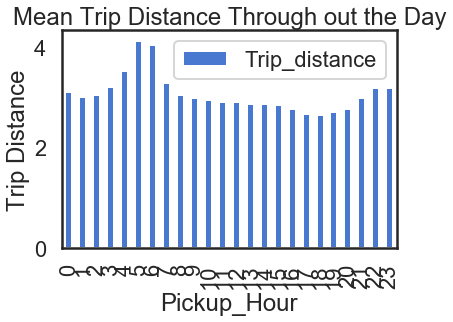

In [29]:
initial_data[['Trip_distance','Pickup_Hour']].groupby('Pickup_Hour').mean().plot.bar()
plt.ylabel('Trip Distance')
plt.title('Mean Trip Distance Through out the Day')

<strong> Observation it seems that the average trip distance is higher between 4 and 7am.  And it starts to increase again starting at 9pm </strong>

Text(0.5, 1.0, 'Median Trip Distance Through out the Day')

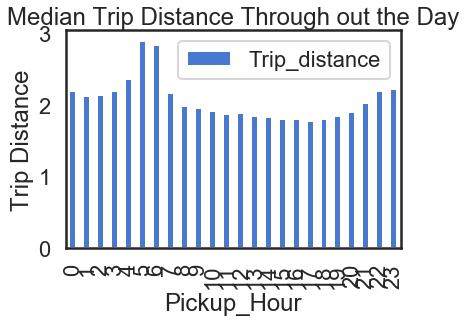

In [28]:
initial_data[['Trip_distance','Pickup_Hour']].groupby('Pickup_Hour').median().plot.bar()
plt.ylabel('Trip Distance')
plt.title('Median Trip Distance Through out the Day')

<strong> The median trip distance is lower between 12am to 4am. Compared to the trips after 6-8am. </strong>

/Users/vanessa/Library/Python/3.7/lib/python/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.


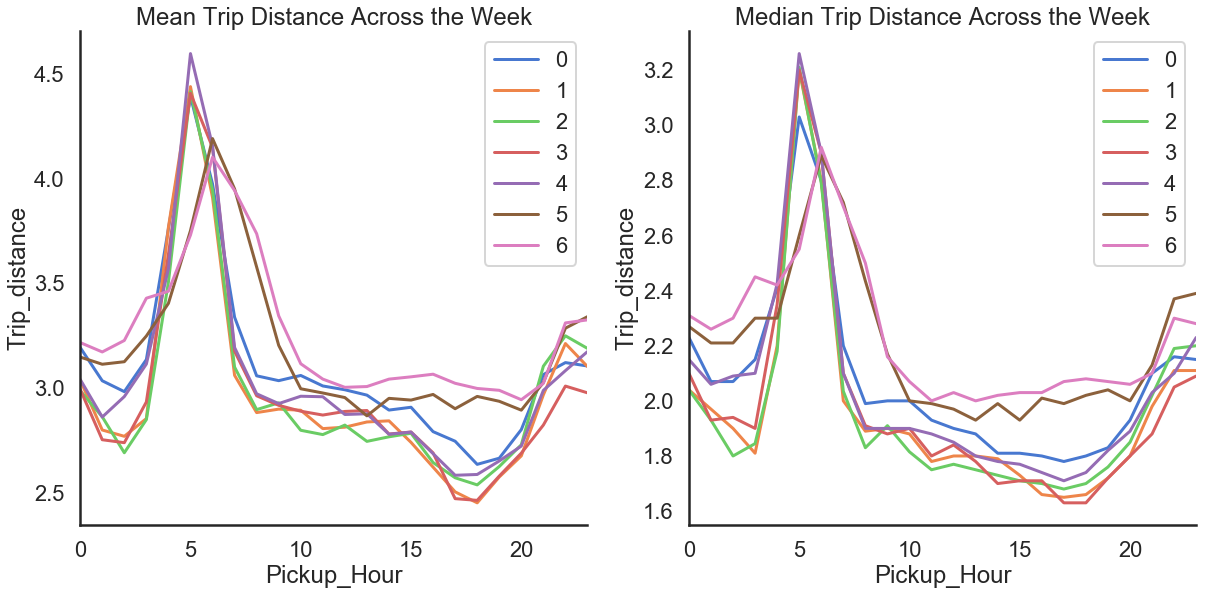

In [22]:

initial_data['lpep_pickup_datetime'] = pd.to_datetime(initial_data.lpep_pickup_datetime) 
initial_data.loc[:,'Day_Of_Week'] = initial_data['lpep_pickup_datetime'].dt.dayofweek

fig=plt.figure();
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
fig.set_figheight(20) # optional setting the height of the image
fig.set_figwidth(20) # optional setting the width of the image

#print(initial_data.head())
avg_duration = pd.DataFrame(initial_data.groupby(['Day_Of_Week','Pickup_Hour'])['Trip_distance'].mean()) 
avg_duration.reset_index(inplace = True)
avg_duration['unit']=1
sns.set(style="white", palette="muted", color_codes=True)
sns.set_context("poster")
sns.tsplot(data=avg_duration, time="Pickup_Hour", unit = "unit", condition="Day_Of_Week", value="Trip_distance",ax=ax1)
sns.despine(bottom = False)
plt.legend(bbox_to_anchor=(1.1, 1.05))
ax1.title.set_text('Mean Trip Distance Across the Week')
ax1.legend()


median_duration = pd.DataFrame(initial_data.groupby(['Day_Of_Week','Pickup_Hour'])['Trip_distance'].median()) 
median_duration.reset_index(inplace = True)
median_duration['unit']=1
sns.set(style="white", palette="muted", color_codes=True)
sns.set_context("poster")
sns.tsplot(data=median_duration, time="Pickup_Hour", unit = "unit", condition="Day_Of_Week", value="Trip_distance",ax=ax2)
sns.despine(bottom = False)
plt.legend(bbox_to_anchor=(1.3, 1.05))
ax2.title.set_text('Median Trip Distance Across the Week')
ax2.legend()


plt.show()

<h3> The days of the week start off as </h3>
0 is Sunday

1 is Monday

2 is Tuesday

3 is Wednesday

4 is Thursday

5 is Friday

6 is Saturday 

we can validate this based on the trend in our data. 

The trip durations  is less on Monday and Tuesday. This could be as it is the start of the week and things are not as hectic. 

The trip durations on Saturday starting at around midnight.
This is not worry some for data. As people go out on Saturdays and if people are out late, it is sometimes easier to take a cab. 

<h1>Question 4.  The taxi drivers want to know what kind of trip yields better tips. Can you build a model for them and explain the model? </h1>

In [27]:
#we are defining airport trips to be 2 or 3. 

filter_air = (initial_data['RateCodeID'].isin([2,3]))

#calculate airport and non airport trips number
initial_data['airport_trip'] = 'nonairport'
initial_data['airport_trip'].loc[filter_air] = 'airport'
print('There are', initial_data['airport_trip'].value_counts()[0],'non-airport trips and',initial_data['airport_trip'].value_counts()[1],'airport trips.')
print('The average fare of all airport trips is',initial_data.groupby(by=['airport_trip']).mean()['Total_amount'][0])

airport_fare=initial_data[['Total_amount','airport_trip']].groupby(by=['airport_trip']).mean()
airport_fare.columns=['mean_total_amount']
airport_fare['standard_deviation']=initial_data[['Total_amount','airport_trip']].groupby(by=['airport_trip']).std()
airport_fare



/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


There are 1489374 non-airport trips and 5552 airport trips.
The average fare of all airport trips is 57.20842038904719


,mean_total_amount,standard_deviation
airport_trip,,
airport,57.208420,26.372664
nonairport,14.874924,11.168032


average total amount of airport ride has a higher standard deviation. This could be as airports fluctate in directions depending where the person is coming from 

We can create a basic logistic model to determine if our hypothesis will be valid of yes airport trips will yield better tips or no 

In [30]:
#for our model lets assume 2 for RateCodeID for airport

new_data = initial_data[['RateCodeID','Payment_type','Tip_amount']]

print(new_data.columns)


#pd.get_dummies(new_data['RateCodeID'],drop_first=True)


#print(new_data.head())

RateCodeID = pd.get_dummies(new_data['RateCodeID'],drop_first=True)

new_data.drop(['RateCodeID'],axis=1,inplace=True)

new_data = pd.concat([new_data,RateCodeID],axis=1)
#check the head of dataframe


Index(['RateCodeID', 'Payment_type', 'Tip_amount'], dtype='object')


In [25]:
#combining 2 and 3. 
#As we are assuming that ratecodeid 2 and 3 are for airports.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data.drop(2,axis=1), 
           new_data[2]+new_data[3], test_size=0.30, 
            random_state=101)

In [26]:
from sklearn.linear_model import LogisticRegression
#create an instance and fit the model 
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/Users/vanessa/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
#predictions
Predictions = logmodel.predict(X_test)
print(Predictions)

[0 0 0 ... 0 0 0]


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,Predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    446840
           1       0.88      0.20      0.32      1638

    accuracy                           1.00    448478
   macro avg       0.94      0.60      0.66    448478
weighted avg       1.00      1.00      1.00    448478



In [47]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, Predictions))

print("We predicted 446796 are true positive")
print("We predicted 324 are true negative")


print("We predicted 44 are false positive")
print("We predicted 1314 are false negative")

accuracy=(446796+324)/(446796+44+1314+324)
print("We have an accuracy of ",accuracy*100)
print("We have an accuracy of 99.69. This is suspicious as this could be as the model potentially has overfit")
print("But it does overall seem reasonable that trip types to the airport produce better tips as rides to and from the \n airport fluctuate in distances")

[[446796     44]
 [  1314    324]]
We predicted 446796 are true positive
We predicted 324 are true negative
We predicted 44 are false positive
We predicted 1314 are false negative
We have an accuracy of  99.69719807883553
We have an accuracy of 99.69. This is suspicious as this could be as the model potentially has overfit
But it does overall seem reasonable that trip types to the airport produce better tips as rides to and from the 
 airport fluctuate in distances


<h1> Question 5: Option 2: Visualize Data to help understand trip patterns </h1>

/usr/local/Cellar/ipython/7.2.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  if __name__ == '__main__':
/usr/local/Cellar/ipython/7.2.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/Cellar/ip

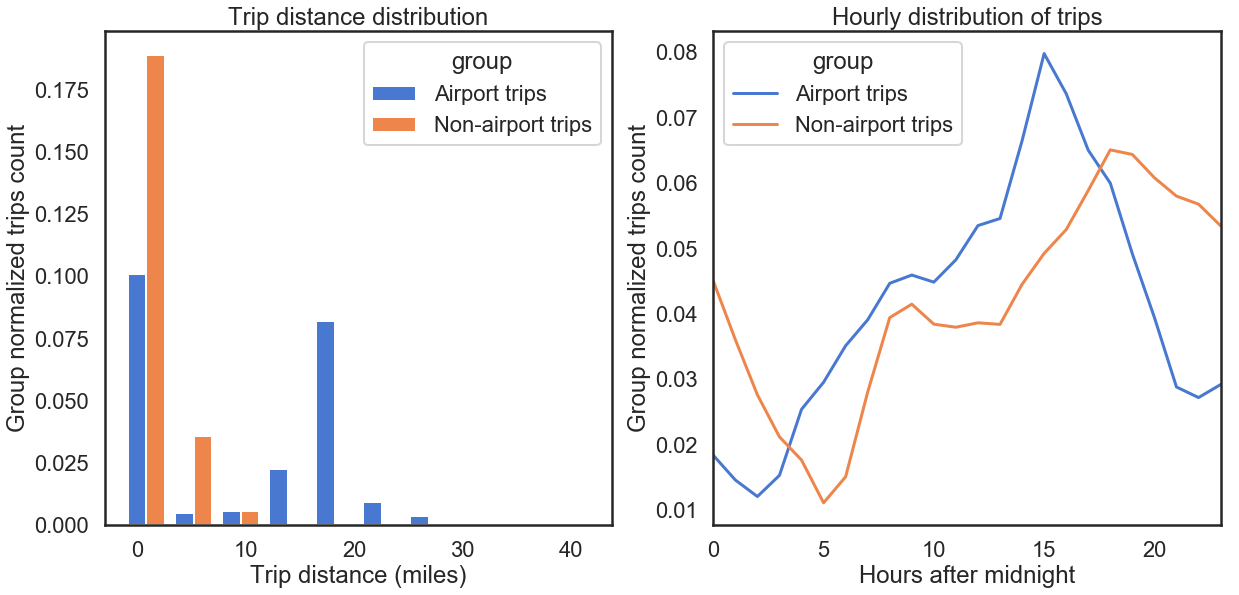

In [24]:
#rate code id 2 and 3 are for airport 
airports_trips = initial_data[(initial_data.RateCodeID==2) | (initial_data.RateCodeID==3)]
v2 = airports_trips.Trip_distance # airport trips
v3 = initial_data.loc[~initial_data.index.isin(v2.index),'Trip_distance'] # non-airport trips
v2 = v2[~((v2-v2.median()).abs()>3*v2.std())]
v3 = v3[~((v3-v3.median()).abs()>3*v3.std())] 

# define bins boundaries
bins = np.histogram(v2,normed=True)[1]
h2 = np.histogram(v2,bins=bins,normed=True)
h3 = np.histogram(v3,bins=bins,normed=True)

# plot distributions of trip distance normalized among groups

fig=plt.figure();
ax = fig.add_subplot(221)
ax1= fig.add_subplot(222)
fig.set_figheight(20) # optional setting the height of the image
fig.set_figwidth(20) # optional setting the width of the image
w = .4*(bins[1]-bins[0])
ax.bar(bins[:-1],h2[0],alpha=1,width=w)
ax.bar(bins[:-1]+w,h3[0],alpha=1,width=w)
ax.legend(['Airport trips','Non-airport trips'],loc='best',title='group')
ax.set_xlabel('Trip distance (miles)')
ax.set_ylabel('Group normalized trips count')
ax.set_title('Trip distance distribution')


airports_trips.Pickup_Hour.value_counts(normalize=True).sort_index().plot(ax=ax1)
initial_data.loc[~initial_data.index.isin(v2.index),'Pickup_Hour'].value_counts(normalize=True).sort_index().plot(ax=ax1)
ax1.set_xlabel('Hours after midnight')
ax1.set_ylabel('Group normalized trips count')
ax1.set_title('Hourly distribution of trips')
ax1.legend(['Airport trips','Non-airport trips'],loc='best',title='group')

<h1> Option 2: Visualize Data to Help Understand Trip patterns results</h1>
<h1> Observing patterns with Trip Distance </h1>
<li> A quick note.  Is that airport trips have the same trend as the rest of  the trips for short trips.  </li>
<li> There is a large number of increased number of long range trips for airports Which are under 20 miles. </li>
<ul> Could be people coming going from airport to residential areas or vice a versa? </ul>
<h1> Observing hourly patterns with Hourly Distribution </h1>   
<li> Airport trips start to peak at 3pm. This seems reasonably as mostly people go to the afternoon for flights or pick people up from the airport in the early afternoon when they have relatives come in </li>
<li> Between midnight and 2am there seems to be less airport riders. But starting at 5am, the amount of riders start to increase again. Maybe people from NYC don't like to catch early flights? </li>
<li> At 10am the amount of riders starts to slowly decrease again, but then starts to increase </li>
<li> Between non airport riders and airport riders it seems neutral </li>